In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pycaret.classification import *

In [4]:
df = pd.read_csv("..\dataset\Absenteeism_at_work.csv", delimiter = ";")

In [5]:
group_hours = []
for i,r in df.iterrows():
    if r["Absenteeism time in hours"] <= 2: group_hours.append("short")
    elif r["Absenteeism time in hours"] <= 8: group_hours.append("medium")
    else: group_hours.append("long")

df["Group Hours"] = group_hours
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Group Hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,medium
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0,short
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2,short
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4,medium
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,short


In [6]:
df["Education"].value_counts()

1    611
3     79
2     46
4      4
Name: Education, dtype: int64

In [7]:
education_col = []
for i,r in df.iterrows():
    if r["Education"] == 1: education_col.append(1)
    else: education_col.append(2)

df["Education"] = education_col

In [8]:
df["Education"].value_counts()

1    611
2    129
Name: Education, dtype: int64

(array([  6., 153.,  50.,  39., 189.,  51.,  42.,   7.,   1., 202.]),
 array([ 5. ,  9.7, 14.4, 19.1, 23.8, 28.5, 33.2, 37.9, 42.6, 47.3, 52. ]),
 <BarContainer object of 10 artists>)

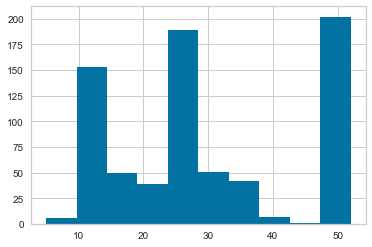

In [9]:
plt.hist(df["Distance from Residence to Work"])

In [10]:
distance_col = []
for i,r in df.iterrows():
    if r["Distance from Residence to Work"] < 20: distance_col.append("near")
    elif r["Distance from Residence to Work"] < 40: distance_col.append("mid")
    else: distance_col.append("far")
    

df["Distance from Residence to Work"] = distance_col
df["Distance from Residence to Work"].value_counts()

mid     321
far     210
near    209
Name: Distance from Residence to Work, dtype: int64

In [ ]:
ignore = ["ID", "Seasons", "Service time","Weight","Absenteeism time in hours"]
ordinal= {"Distance from Residence to Work" : ['near', 'mid', 'far']}
high_c = ["Reason for absence"]
num = ["Height","Body mass index"]
clf = setup(
        data=df, 
        target="Group Hours", 
        ignore_features= ignore, 
        ordinal_features = ordinal, 
        high_cardinality_features = high_c,
        numeric_features = num
    )

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:53:23
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Reason for absence,Numeric
Month of absence,Categorical
Day of the week,Categorical
Transportation expense,Numeric
Distance from Residence to Work,Categorical
Age,Numeric
Work load Average/day,Numeric
Hit target,Categorical
Disciplinary failure,Categorical
Education,Categorical


In [ ]:
compare_models()